In [39]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/vgsales.csv')

In [41]:
import datetime

dataset['Year'] = dataset['Year'].apply(lambda x: str(int(x)) if pd.notnull(x) else None)
dataset['order_year'] = dataset['Year'].apply(lambda x: datetime.datetime.strptime(x, "%Y").strftime('%Y') if pd.notnull(x) else None)

print(dataset.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales order_year  
0     41.49     29.02      3.77         8.46         82.74       2006  
1     29.08      3.58      6.81         0.77         40.24       1985  
2     15.85     12.88      3.79         3.31         35.82       2008  
3     15.75     11.01      3.28         2.96         33.00       2009  
4     11.27      8.89     10.22         1.00         31.37       1996  


In [42]:
dataset['gmv'] = dataset['NA_Sales'] + dataset['EU_Sales'] + dataset['JP_Sales'] + dataset['Other_Sales']
print('Ukuran dataset: %d baris dan %d kolom\n' % dataset.shape)
print('Lima data teratas:')
print(dataset.head())

Ukuran dataset: 16598 baris dan 13 kolom

Lima data teratas:
   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales order_year    gmv  
0     41.49     29.02      3.77         8.46         82.74       2006  82.74  
1     29.08      3.58      6.81         0.77         40.24       1985  40.24  
2     15.85     12.88      3.79         3.31         35.82       2008  35.83  
3     15.75     11.01      3.28         2.96         33.00       2009  33.00  
4     11.27      8.89     10.22         1.00         31.37       1996  31.38  


In [43]:
yearly_amount = dataset.groupby('order_year')['gmv'].sum().reset_index()
print(yearly_amount)

   order_year     gmv
0        1980   11.38
1        1981   35.68
2        1982   28.88
3        1983   16.80
4        1984   50.35
5        1985   53.95
6        1986   37.08
7        1987   21.70
8        1988   47.21
9        1989   73.45
10       1990   49.37
11       1991   32.23
12       1992   76.14
13       1993   45.99
14       1994   79.22
15       1995   88.11
16       1996  199.15
17       1997  201.07
18       1998  256.33
19       1999  251.12
20       2000  201.63
21       2001  331.49
22       2002  394.97
23       2003  357.61
24       2004  418.85
25       2005  459.41
26       2006  520.52
27       2007  610.44
28       2008  678.49
29       2009  667.10
30       2010  600.36
31       2011  515.93
32       2012  363.30
33       2013  367.98
34       2014  337.10
35       2015  264.26
36       2016   70.87
37       2017    0.05
38       2020    0.29


Text(0.5, 0, 'Order Year')

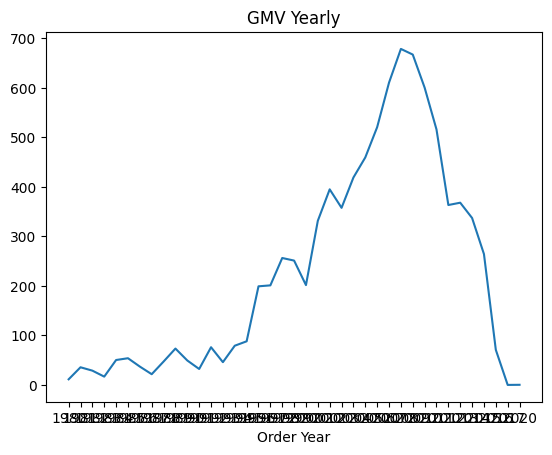

In [44]:
import matplotlib.pyplot as plt

plt.plot(yearly_amount['order_year'], yearly_amount['gmv'])
plt.title('GMV Yearly')
plt.xlabel('Order Year')

Text(0.5, 1.0, 'Yearly GMV 1980 - 2020')

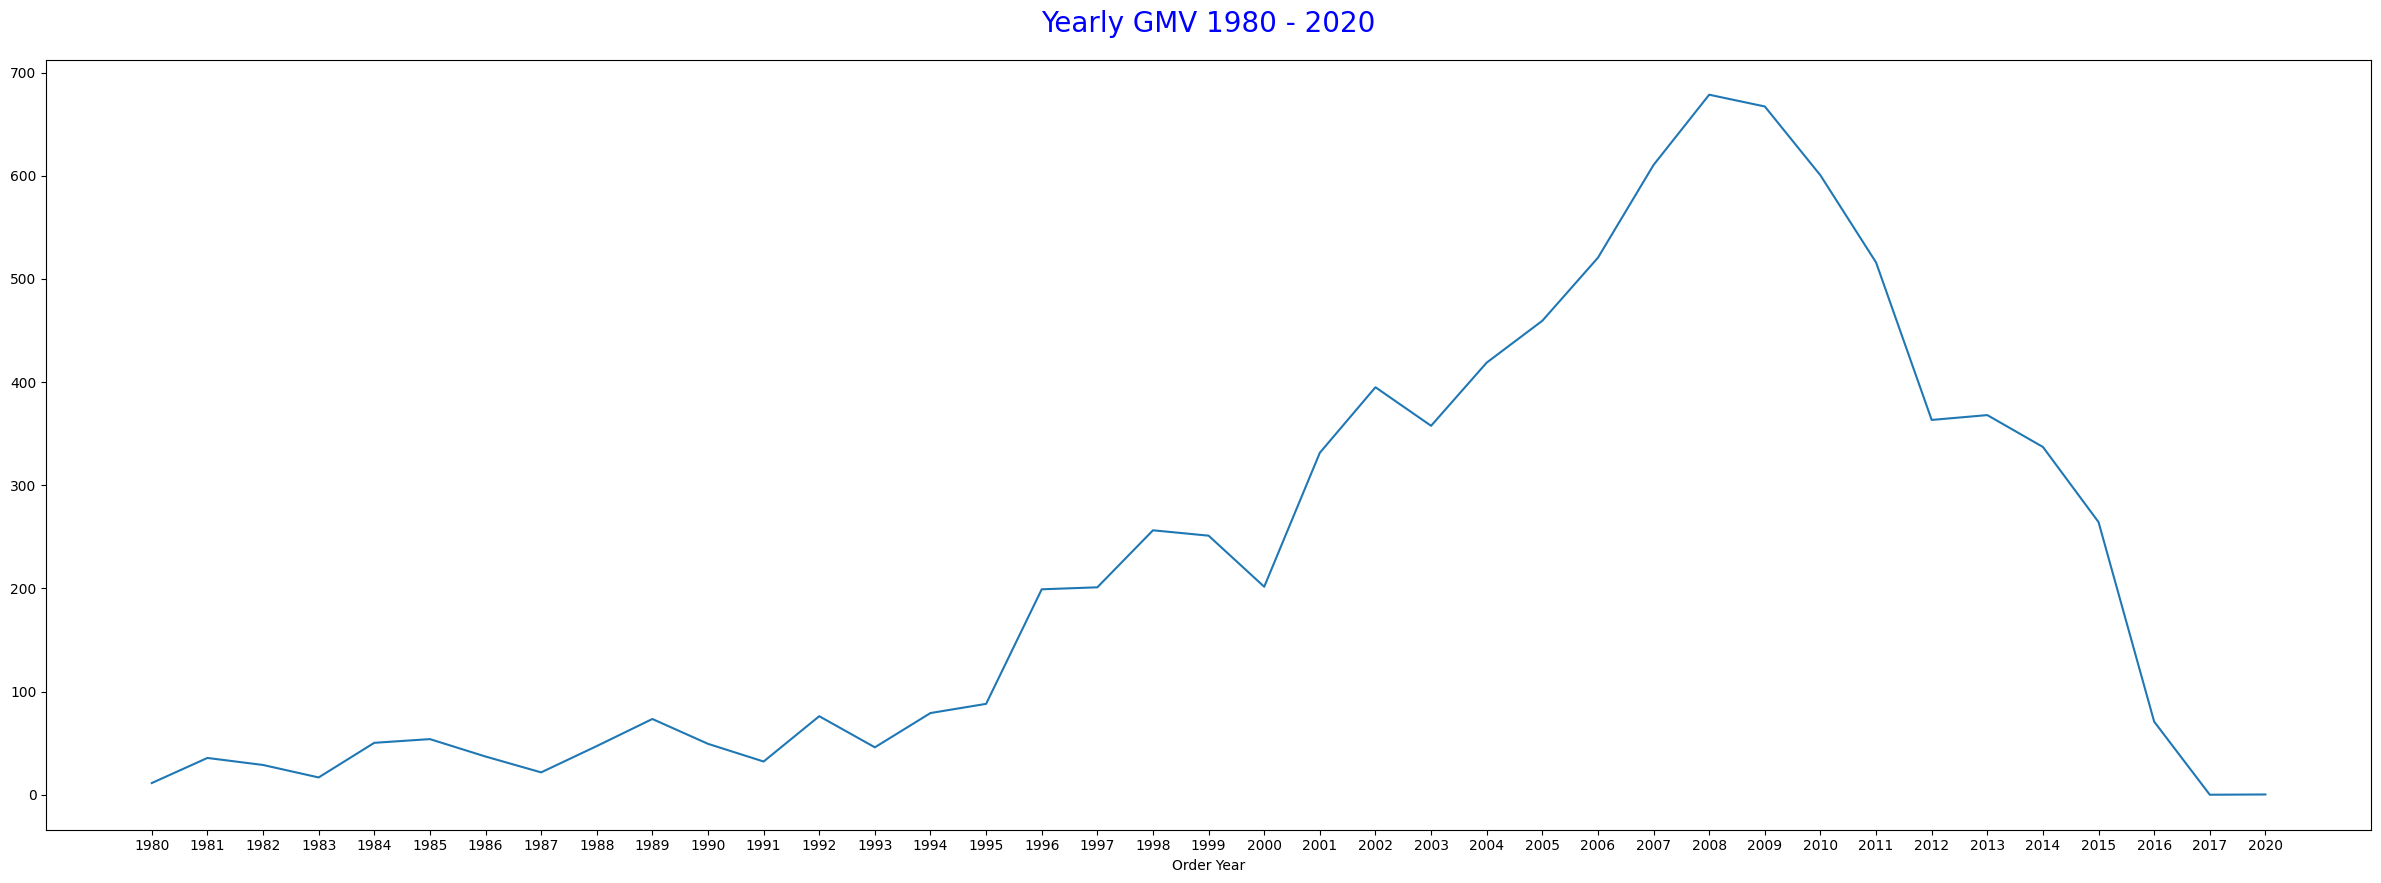

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 10))
plt.plot(yearly_amount['order_year'], yearly_amount['gmv'])
plt.title('GMV Yearly')
plt.xlabel('Order Year')
plt.title('Yearly GMV 1980 - 2020', loc='center', pad=20, fontsize=20, color='blue')

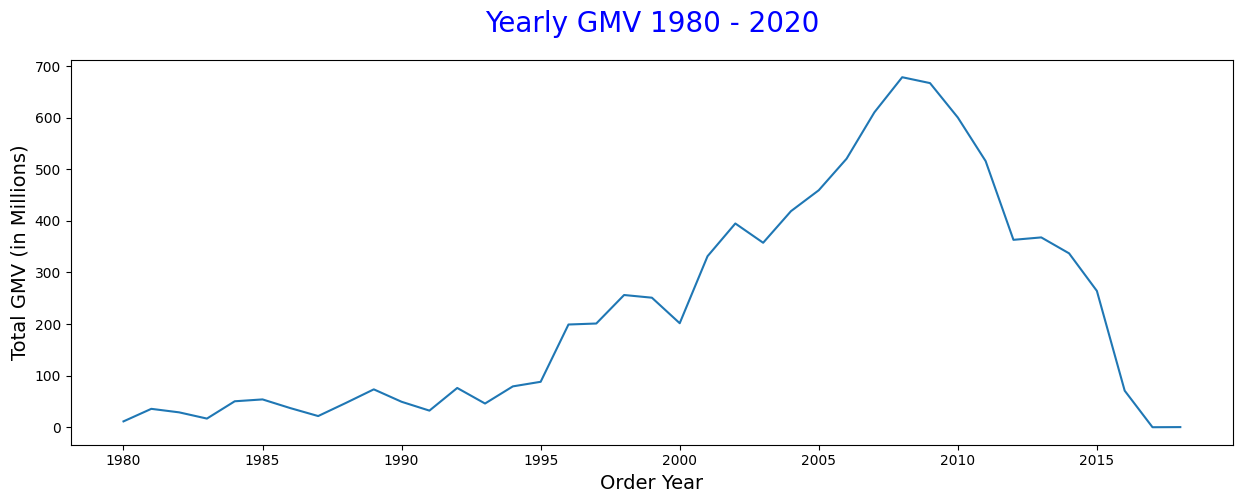

In [49]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_year'])['gmv'].sum().plot()
plt.title('Yearly GMV 1980 - 2020', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Year', fontsize=14)
plt.ylabel('Total GMV (in Millions)', fontsize=14)
plt.show()


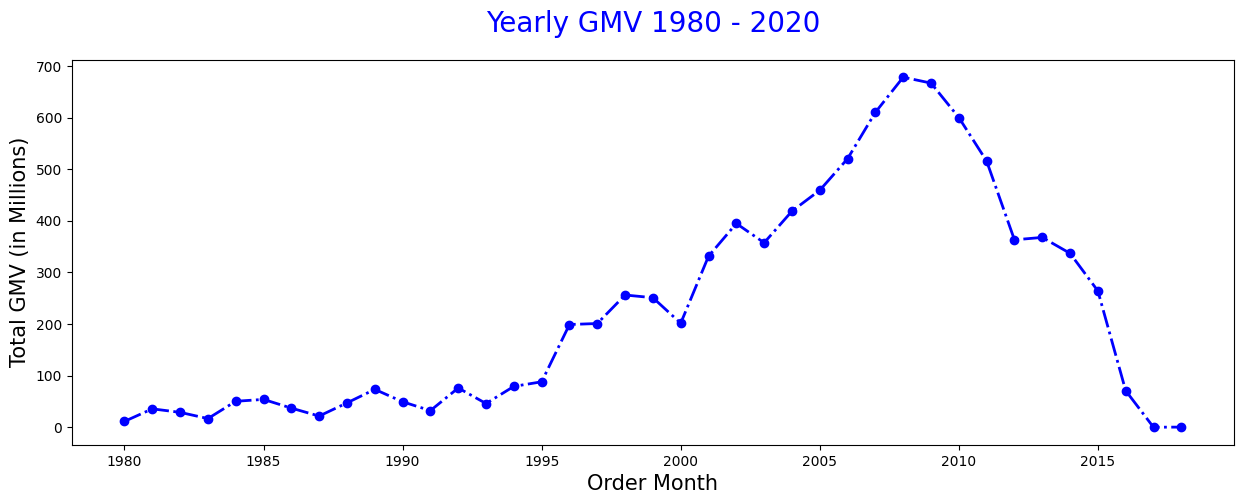

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_year'])['gmv'].sum().plot(color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Yearly GMV 1980 - 2020', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total GMV (in Millions)', fontsize=15)
plt.show()


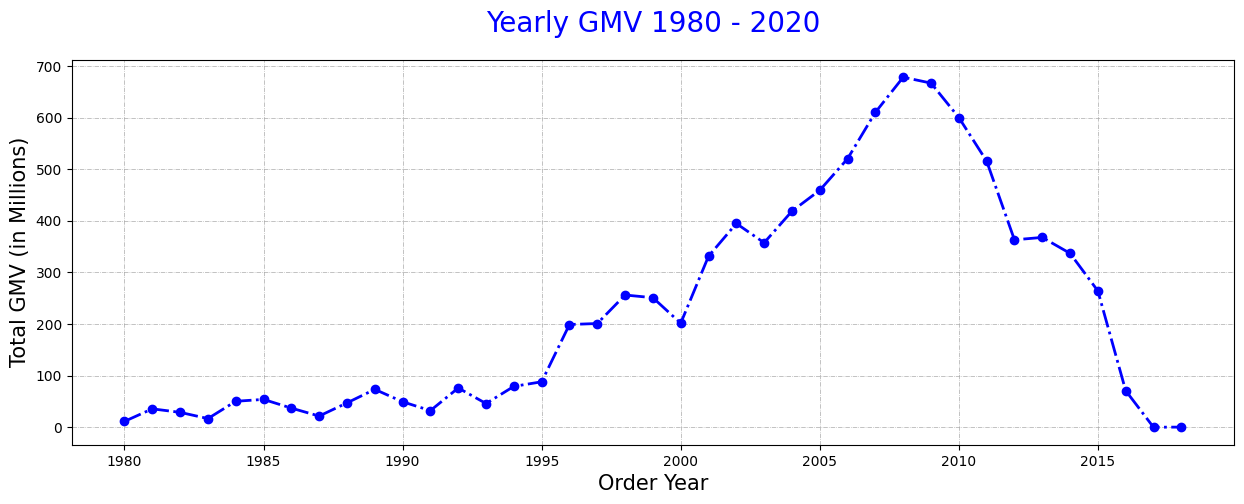

In [53]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_year'])['gmv'].sum().plot(color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Yearly GMV 1980 - 2020', loc='center', pad=20, fontsize=20, color='blue')
plt.xlabel('Order Year', fontsize=15)
plt.ylabel('Total GMV (in Millions)', fontsize=15)
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.show()


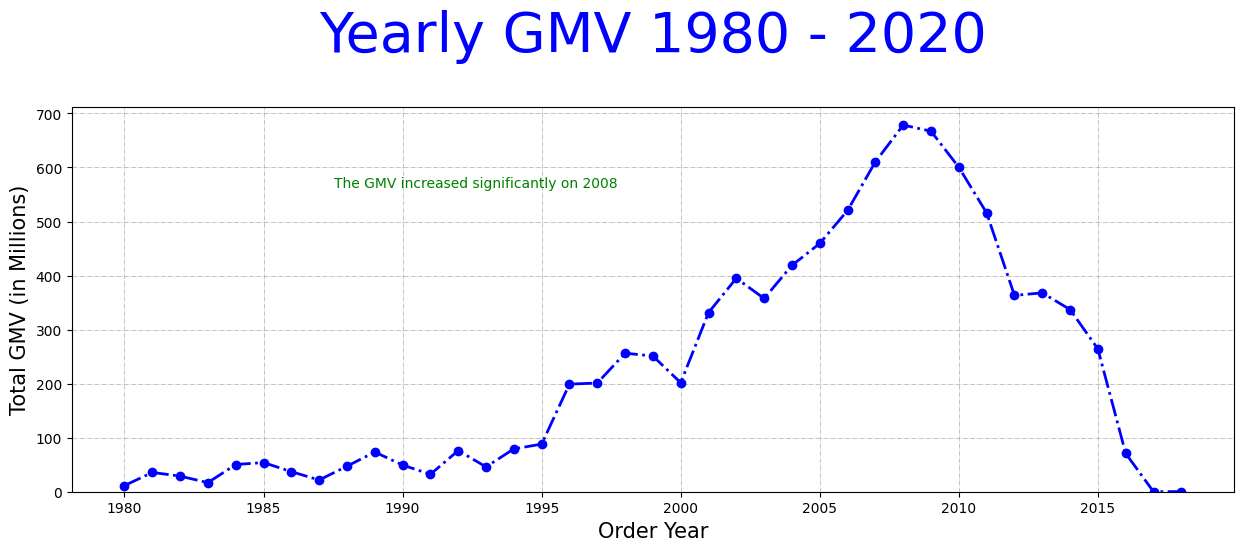

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
dataset.groupby(['order_year'])['gmv'].sum().plot(color='blue', marker='o', linestyle='-.', linewidth=2)
plt.title('Yearly GMV 1980 - 2020', loc='center', pad=40, fontsize=40, color='blue')
plt.xlabel('Order Year', fontsize=15)
plt.ylabel('Total GMV (in Millions)', fontsize=15)
plt.grid(color='darkgray', linestyle='-.', linewidth=0.5)
plt.ylim(ymin=0)
labels, location = plt.yticks()
plt.text(0.30, 0.72, "The GMV increased significantly on 2008",
         transform=plt.gcf().transFigure, color='green', )
plt.show()
